In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [3]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')
covid19.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered WHO Region  
0          0       emro  
1          0       euro  
2          0       afro  
3          0       euro  
4          0       afro

In [4]:
print(covid19.shape)
print('\n Check for null values:')
print(covid19.isnull().sum())
print('\n\n Data types:\n',covid19.dtypes)

(36570, 9)

 Check for null values:
Province/State    25530
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
WHO Region          276
dtype: int64


 Data types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
WHO Region         object
dtype: object


In [5]:
#Drop the columns Province/State and WHO Region
covid19.drop(['Province/State','WHO Region'], axis=1, inplace=True)
covid19.head(10)

Country/Region      Lat      Long     Date  Confirmed  Deaths  \
0          Afghanistan  33.0000   65.0000  1/22/20          0       0   
1              Albania  41.1533   20.1683  1/22/20          0       0   
2              Algeria  28.0339    1.6596  1/22/20          0       0   
3              Andorra  42.5063    1.5218  1/22/20          0       0   
4               Angola -11.2027   17.8739  1/22/20          0       0   
5  Antigua and Barbuda  17.0608  -61.7964  1/22/20          0       0   
6            Argentina -38.4161  -63.6167  1/22/20          0       0   
7              Armenia  40.0691   45.0382  1/22/20          0       0   
8            Australia -35.4735  149.0124  1/22/20          0       0   
9            Australia -33.8688  151.2093  1/22/20          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

In [6]:
print(covid19.isnull().sum())

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64


In [7]:
covid19['Date'] = pd.to_datetime(covid19['Date'])

In [8]:
covid19.head()

Country/Region      Lat     Long       Date  Confirmed  Deaths  Recovered
0    Afghanistan  33.0000  65.0000 2020-01-22          0       0          0
1        Albania  41.1533  20.1683 2020-01-22          0       0          0
2        Algeria  28.0339   1.6596 2020-01-22          0       0          0
3        Andorra  42.5063   1.5218 2020-01-22          0       0          0
4         Angola -11.2027  17.8739 2020-01-22          0       0          0

Total number of confirmed cases all over the world:  7009058
Total number of recovered cases all over the world:  3068626
Total number of deaths all over the world:           402730
Total number of active cases all over the world:     3537702
Total number of closed cases all over the world:     3471356


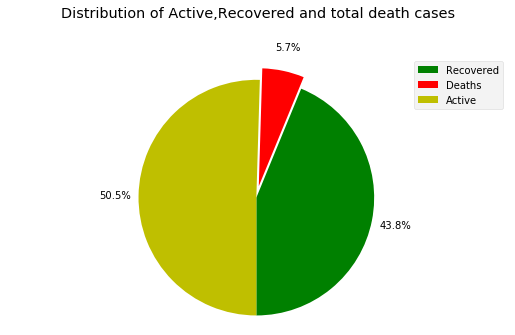

In [9]:
#grouping confirmed,Deaths and Recovered as per the date and printing the data for the last date for which we have data
byDate = covid19.groupby(['Date']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
print('Total number of confirmed cases all over the world: ',byDate['Confirmed'].iloc[-1])
print('Total number of recovered cases all over the world: ',byDate['Recovered'].iloc[-1])
print('Total number of deaths all over the world:          ',byDate['Deaths'].iloc[-1])
print('Total number of active cases all over the world:    ',byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1])
print('Total number of closed cases all over the world:    ',byDate['Recovered'].iloc[-1]+byDate['Deaths'].iloc[-1])
labels = ['Recovered','Deaths','Active']
sizes = [byDate['Recovered'].iloc[-1],byDate['Deaths'].iloc[-1],byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1]]
colors = ['g','r','y']
explode = [0,0.1,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=-90)
plt.axis('equal')
plt.title('Distribution of Active,Recovered and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

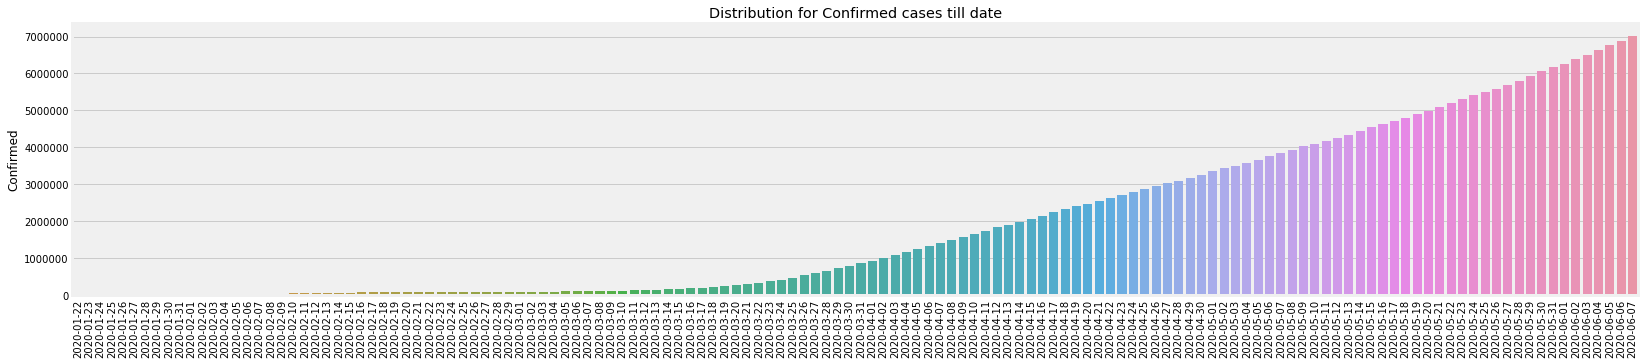

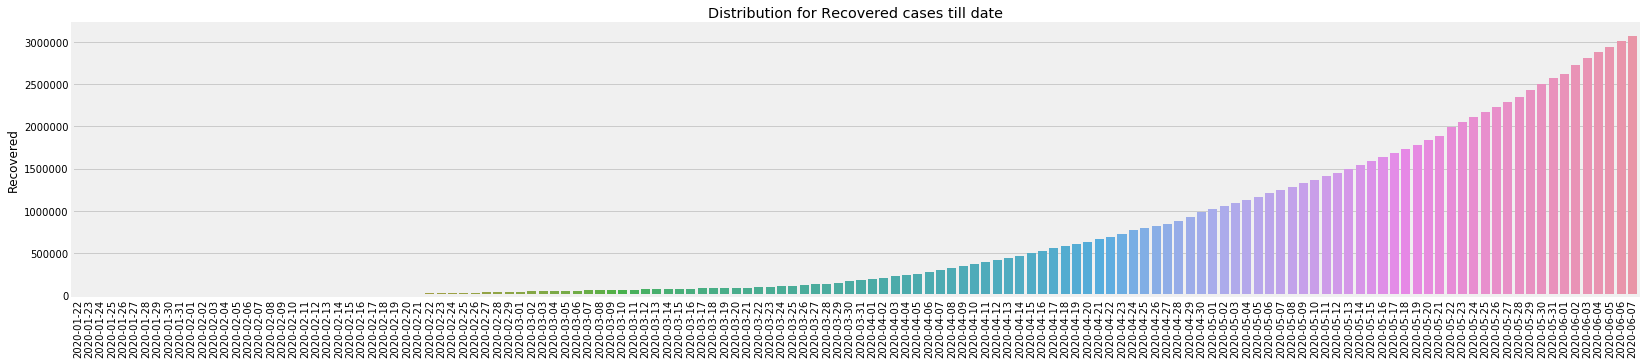

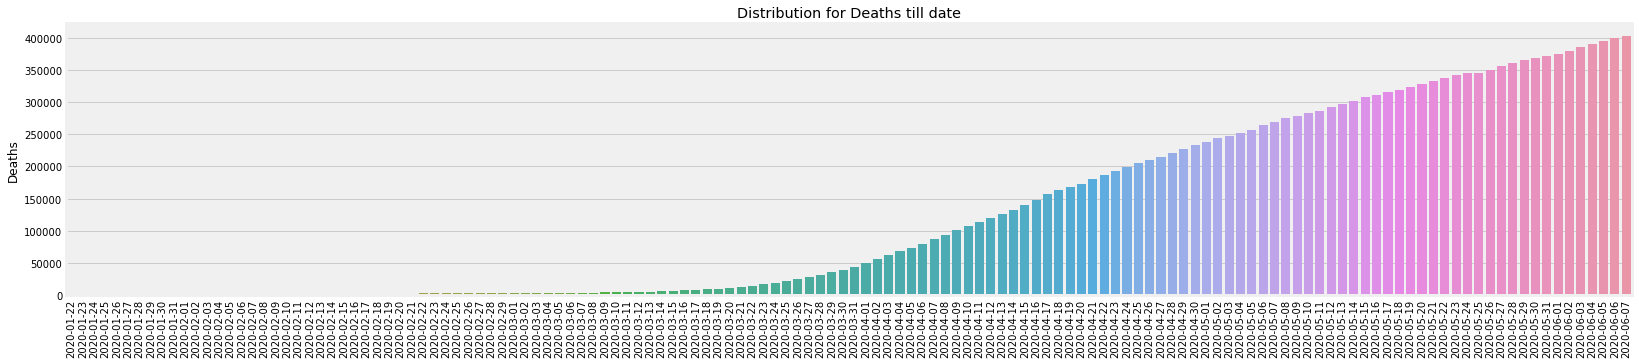

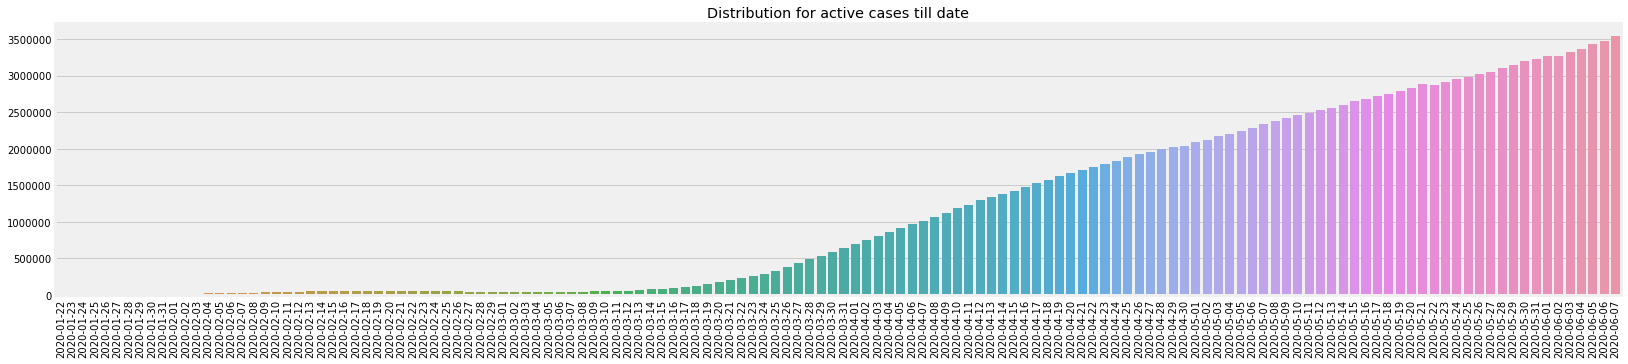

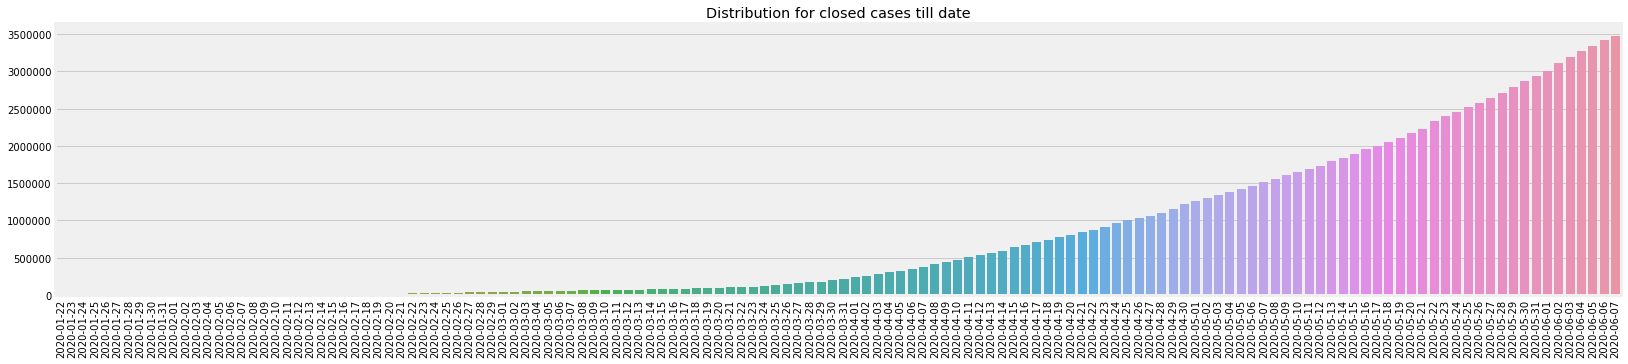

In [10]:
plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Confirmed'])
plt.title('Distribution for Confirmed cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Recovered'])
plt.title('Distribution for Recovered cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Deaths'])
plt.title('Distribution for Deaths till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Confirmed']-byDate['Deaths']-byDate['Recovered'])
plt.title('Distribution for active cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Deaths']+byDate['Recovered'])
plt.title('Distribution for closed cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

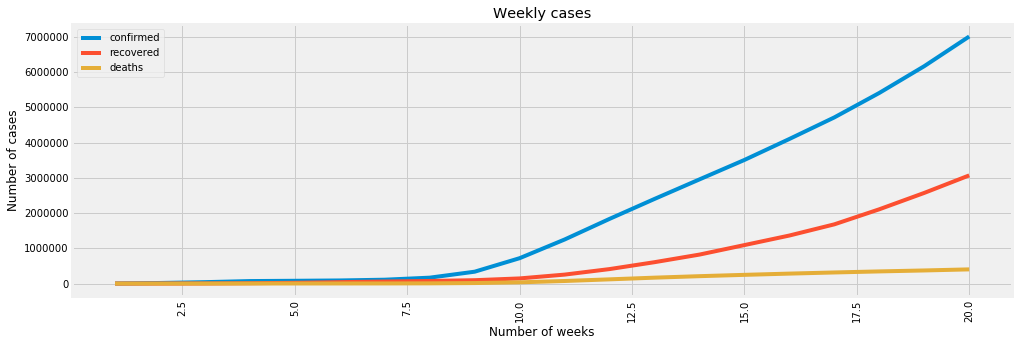

In [11]:
byDate['Weekly'] = byDate.index.weekofyear
week_number = []
weekly_confirmed = []
weekly_recovered = []
weekly_deaths = []

week = 1
for i in list(byDate['Weekly'].unique()):
  weekly_confirmed.append(byDate[byDate['Weekly']==i]['Confirmed'].iloc[-1])
  weekly_recovered.append(byDate[byDate['Weekly']==i]['Recovered'].iloc[-1])
  weekly_deaths.append(byDate[byDate['Weekly']==i]['Deaths'].iloc[-1])
  week_number.append(week)
  week = week+1

plt.figure(figsize = (15,5))
sns.lineplot(week_number,weekly_confirmed,label='confirmed')
sns.lineplot(week_number,weekly_recovered,label='recovered')
sns.lineplot(week_number,weekly_deaths,label='deaths')
plt.title('Weekly cases')
plt.xlabel('Number of weeks')
plt.ylabel('Number of cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

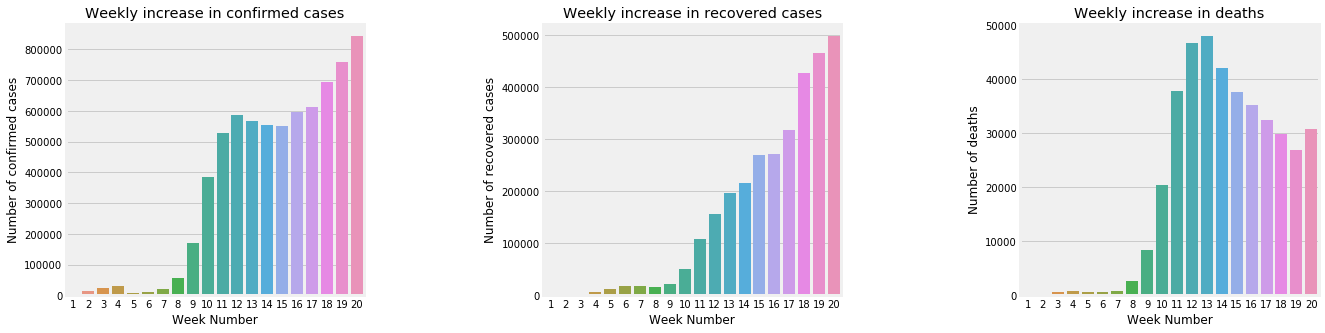

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(hspace=1.5, wspace=0.6)
sns.barplot(x=week_number,y=pd.Series(weekly_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number,y=pd.Series(weekly_recovered).diff().fillna(0),ax=ax2)
sns.barplot(x=week_number,y=pd.Series(weekly_deaths).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax3.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of recovered cases')
ax3.set_ylabel('Number of deaths')
ax1.set_title('Weekly increase in confirmed cases')
ax2.set_title('Weekly increase in recovered cases')
ax3.set_title('Weekly increase in deaths')
plt.show()

Average increase in number of confirmed cases everyday:  50786.0
Average increase in number of recovered cases everyday:  22236.0
Average increase in number of deaths everyday:           2918.0





C:\Users\Vedant Bharti\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


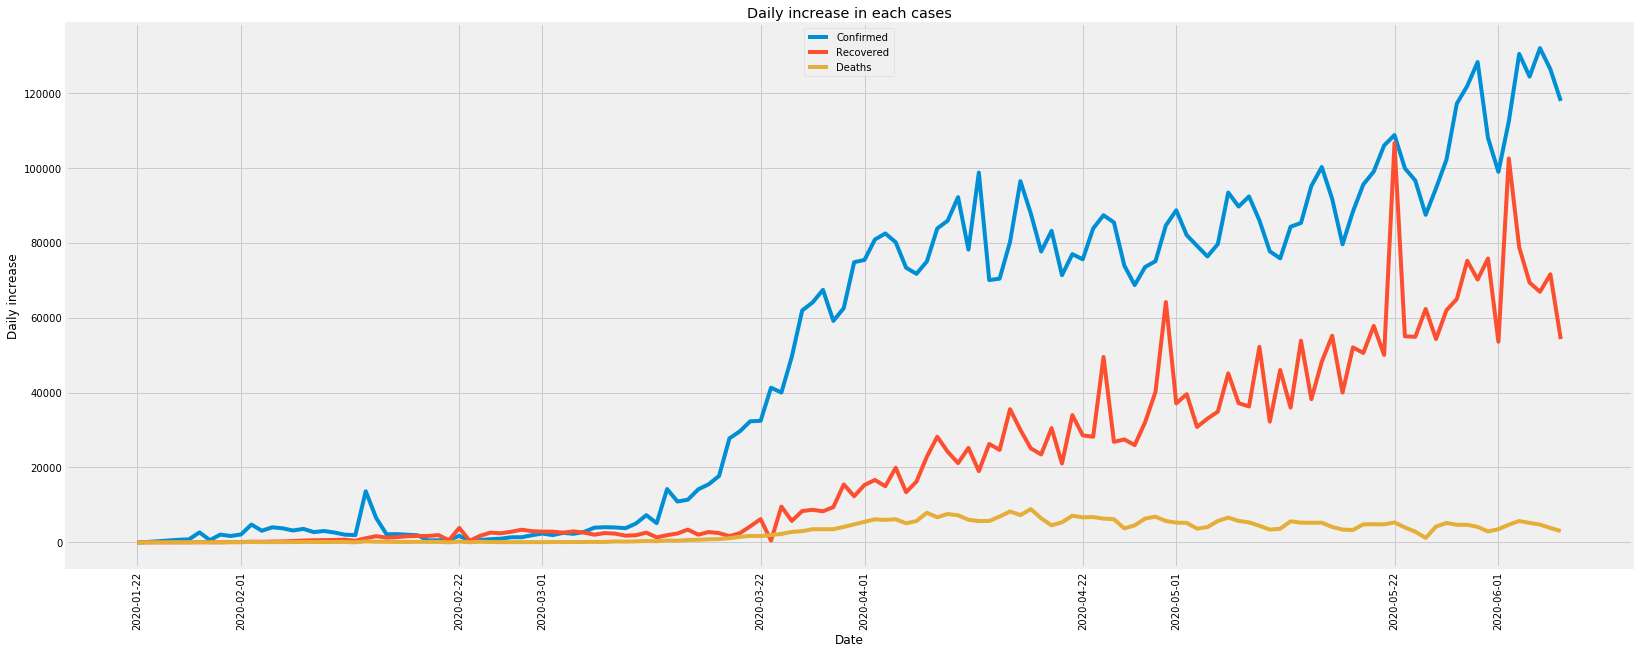

In [13]:
print('Average increase in number of confirmed cases everyday: ',np.round(byDate['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of recovered cases everyday: ',np.round(byDate['Recovered'].diff().fillna(0).mean()))
print('Average increase in number of deaths everyday:          ',np.round(byDate['Deaths'].diff().fillna(0).mean()))
print('\n\n')
plt.figure(figsize=(25,10))
plt.plot(byDate['Confirmed'].diff().fillna(0),label='Confirmed')
plt.plot(byDate['Recovered'].diff().fillna(0),label='Recovered')
plt.plot(byDate['Deaths'].diff().fillna(0),label='Deaths')
plt.xlabel('Date')
plt.ylabel('Daily increase')
plt.title('Daily increase in each cases')
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.show()

In [14]:
#Countrywise analysis of mortality rate
#mortality rate = number of deaths/number of confirmed cases

byCountry = covid19[covid19['Date']==covid19['Date'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(by='Confirmed',ascending=False)
byCountry['Mortality Rate'] = (byCountry['Deaths']/byCountry['Confirmed'])*100
byCountry['Recovery Rate'] = (byCountry['Recovered']/byCountry['Confirmed'])*100
byCountry


Confirmed  Recovered  Deaths  \
Country/Region                                                   
US                                  1942363     506367  110514   
Brazil                               691758     283952   36455   
Russia                               467073     226272    5851   
United Kingdom                       287621       1239   40625   
India                                257486     123848    7207   
Spain                                241550     150376   27136   
Italy                                234998     165837   33899   
Peru                                 196515      86219    5465   
France                               191102      70961   29158   
Germany                              185750     169224    8685   
Iran                                 171789     134349    8281   
Turkey                               170132     137969    4692   
Chile                                134150     108150    1637   
Mexico                               117103      83775   13699   
Saudi Arabia                         101914      72817     712   
Pakistan                              98943      33465    2002   
Canada                                97178          0    7877   
China                                 84191      76399    4638   
Qatar                                 68790      44338      54   
Bangladesh                            65769      13903     888   
Belgium                               59226      16291    9595   
Belarus                               48630      23647     269   
South Africa                          48285      24364     998   
Netherlands                           47773        174    6032   
Sweden                                44730          0    4659   
Ecuador                               43120      21020    3621   
United Arab Emirates                  38808      21806     276   
Colombia                              38149      14414    1265   
Singapore                             37910      24886      25   
Portugal                              34693      20995    1479   
...                                     ...        ...     ...   
Cambodia                                126        123       0   
Suriname                                122          9       1   
Trinidad and Tobago                     117        108       8   
Bahamas                                 103         62      11   
Monaco                                   99         93       4   
Barbados                                 92         81       7   
Angola                                   91         24       4   
Burundi                                  83         45       1   
Liechtenstein                            82         55       1   
Bhutan                                   59         11       0   
Botswana                                 40         23       1   
Eritrea                                  39         39       0   
Namibia                                  29         16       0   
Saint Vincent and the Grenadines         27         16       0   
Antigua and Barbuda                      26         20       3   
Gambia                                   26         21       1   
Timor-Leste                              24          0       0   
Grenada                                  23          0       0   
Belize                                   19         16       2   
Laos                                     19          0       0   
Saint Lucia                              19         18       0   
Dominica                                 18         16       0   
Fiji                                     18         18       0   
Saint Kitts and Nevis                    15         15       0   
Holy See                                 12         12       0   
Seychelles                               11         11       0   
MS Zaandam                                9          0       2   
Western Sahara                            9          6       1   
Papua Ne

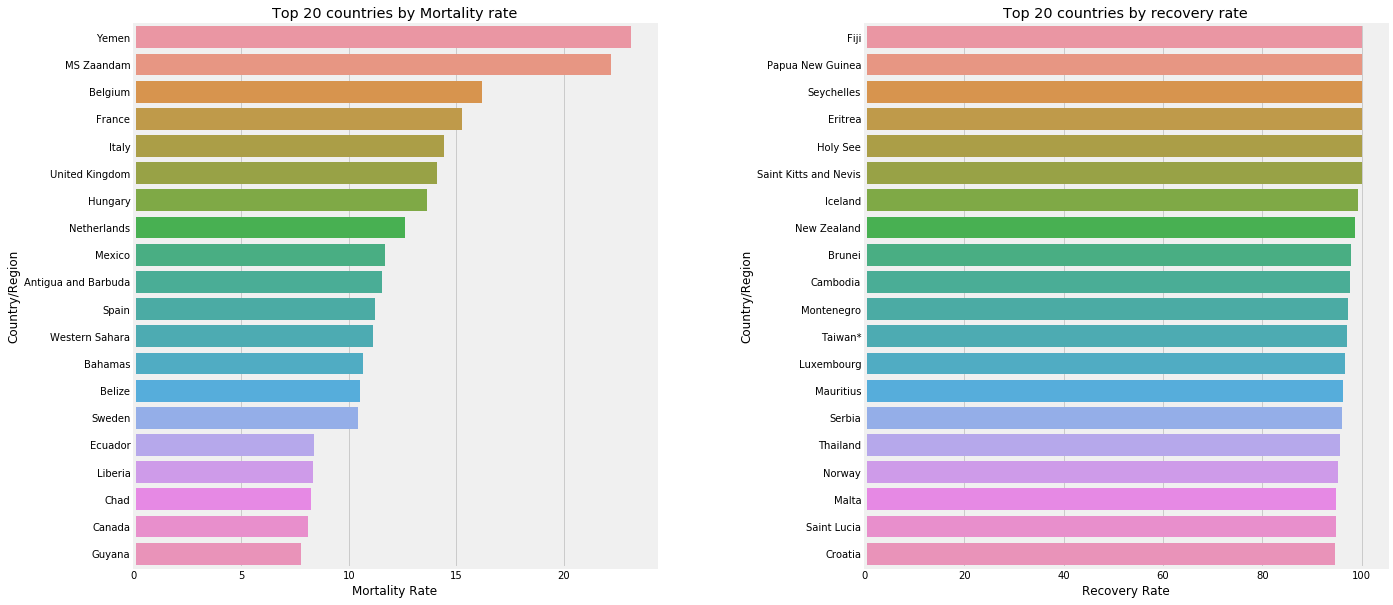

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).head(20)
top_20_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).head(20)
sns.barplot(x=top_20_mortality_countries['Mortality Rate'],y=top_20_mortality_countries.index,ax=ax1)
sns.barplot(x=top_20_recovery_countries['Recovery Rate'],y=top_20_recovery_countries.index,ax=ax2)
ax1.set_title('Top 20 countries by Mortality rate')
ax2.set_title('Top 20 countries by recovery rate')
plt.show()

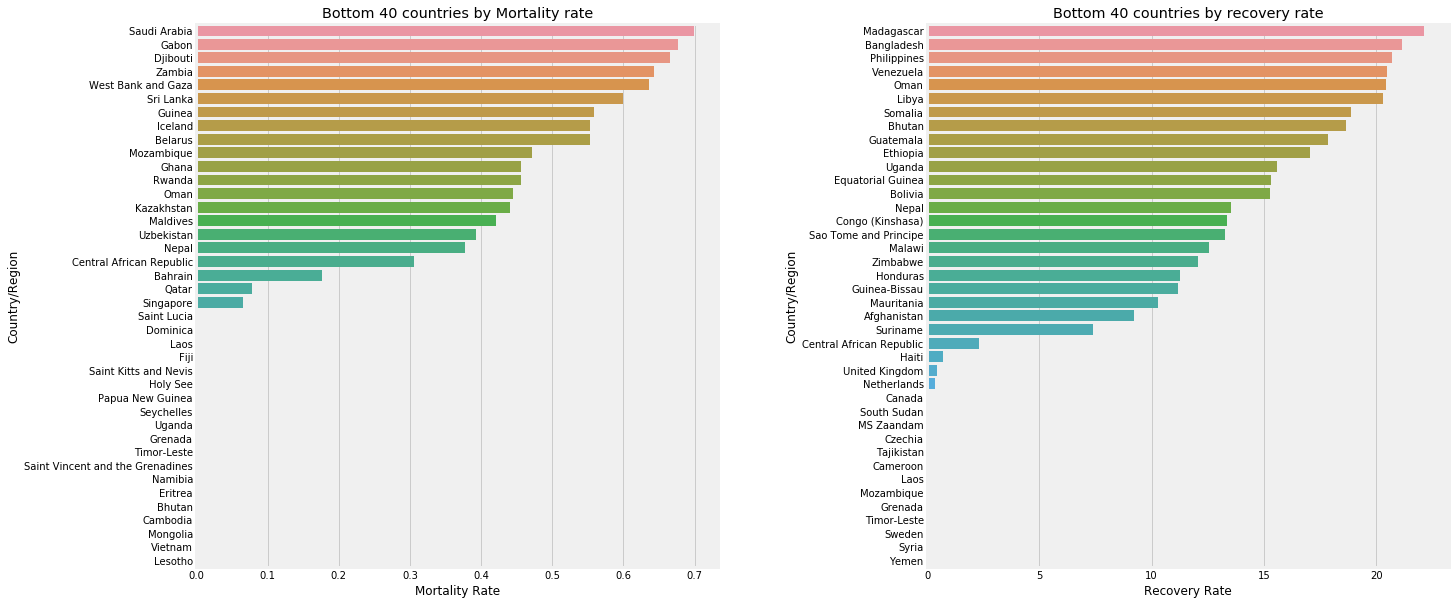

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
bottom_40_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).tail(40)
bottom_40_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).tail(40)
sns.barplot(x=bottom_40_mortality_countries['Mortality Rate'],y=bottom_40_mortality_countries.index,ax=ax1)
sns.barplot(x=bottom_40_recovery_countries['Recovery Rate'],y=bottom_40_recovery_countries.index,ax=ax2)
ax1.set_title('Bottom 40 countries by Mortality rate')
ax2.set_title('Bottom 40 countries by recovery rate')
plt.show()

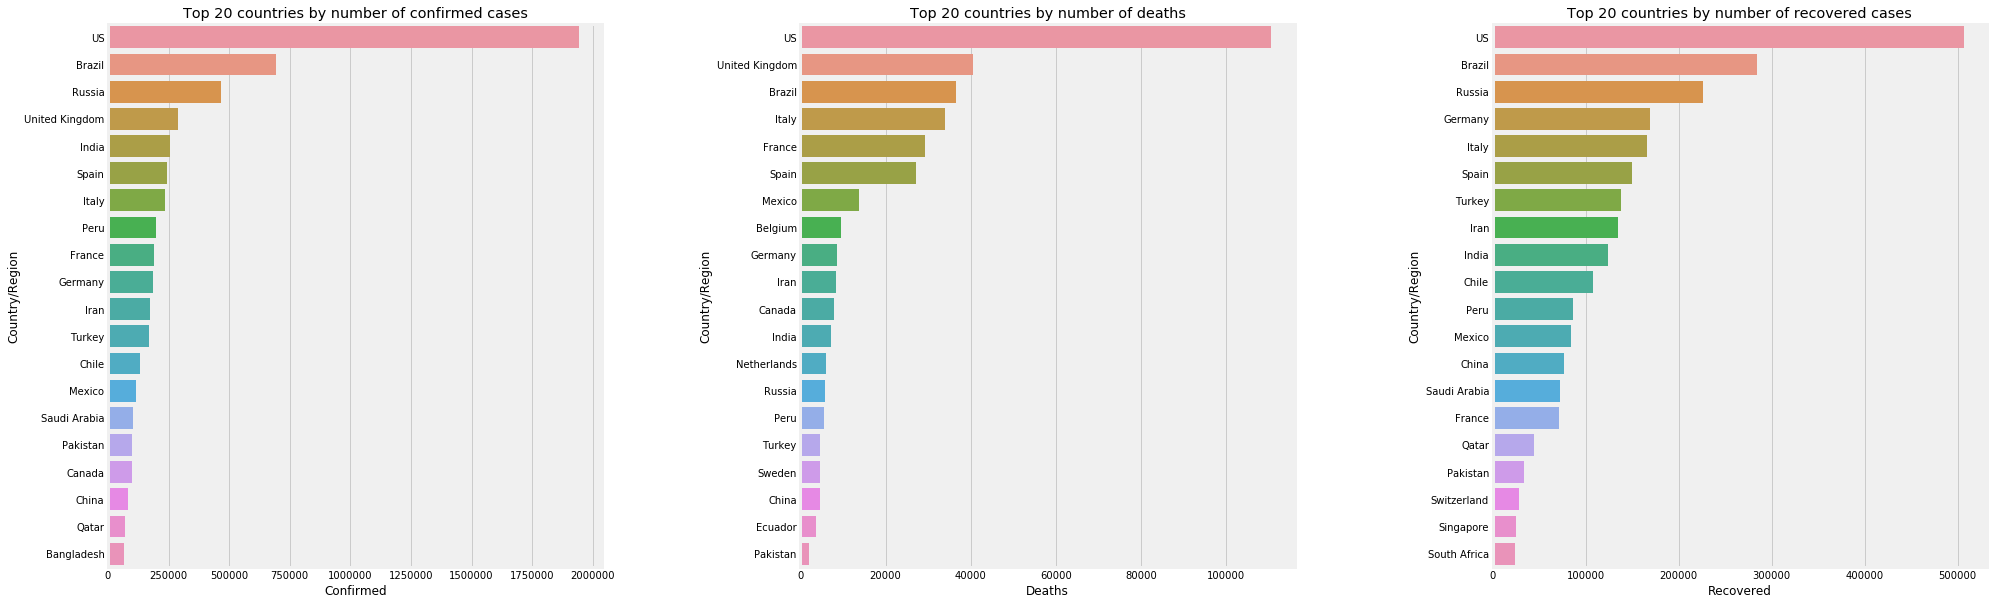

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).head(20)
top_20_death_countries = byCountry.sort_values(by='Deaths',ascending=False).head(20)
top_20_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).head(20)
sns.barplot(x=top_20_confirmed_countries['Confirmed'],y=top_20_confirmed_countries.index,ax=ax1)
sns.barplot(x=top_20_death_countries['Deaths'],y=top_20_death_countries.index,ax=ax2)
sns.barplot(x=top_20_recovered_countries['Recovered'],y=top_20_recovered_countries.index,ax=ax3)
ax1.set_title('Top 20 countries by number of confirmed cases')
ax2.set_title('Top 20 countries by number of deaths')
ax3.set_title('Top 20 countries by number of recovered cases')
plt.show()

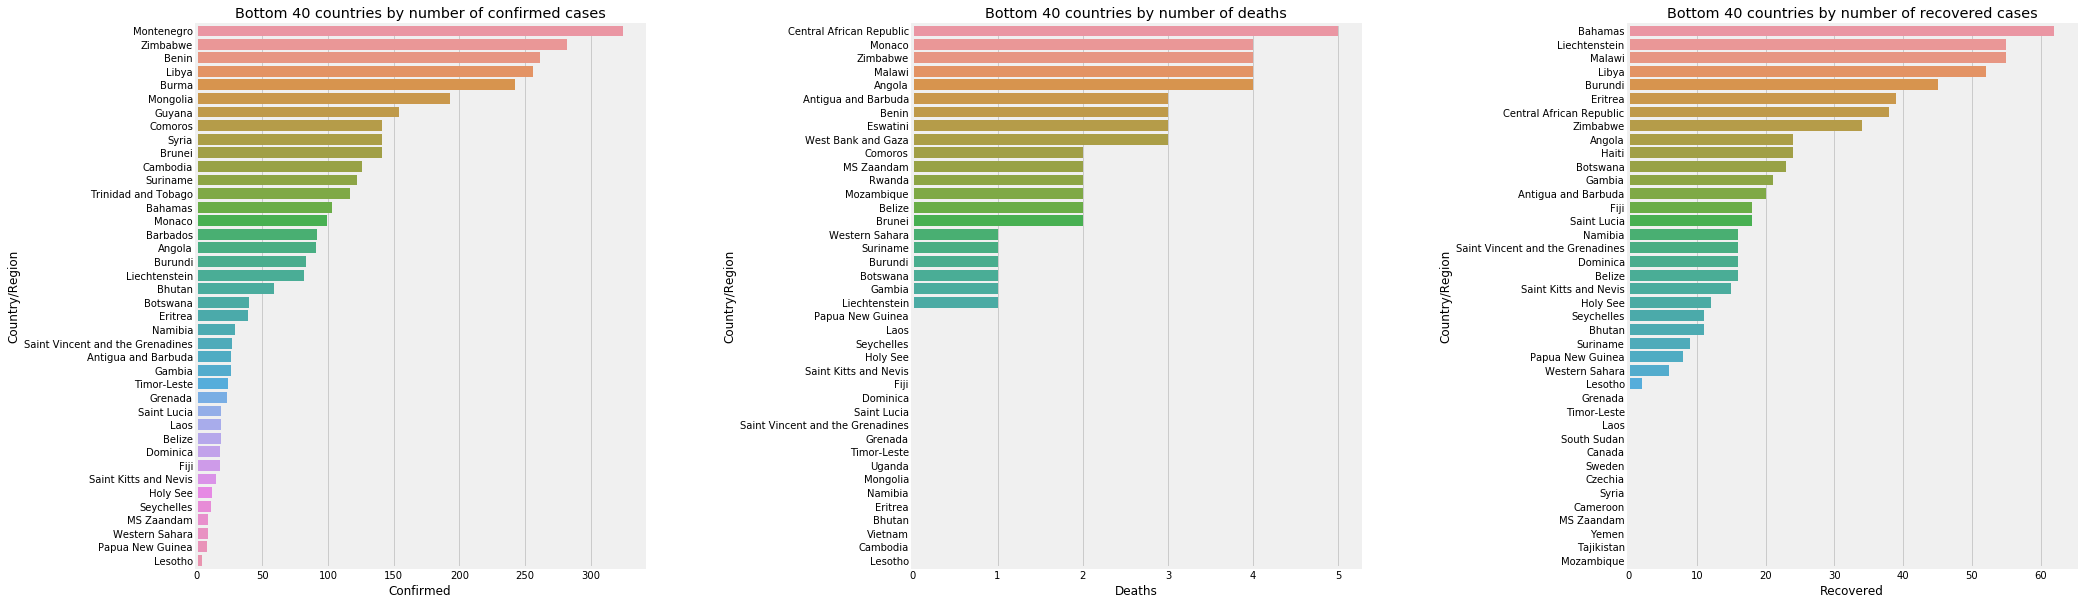

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.6)
bottom_40_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).tail(40)
bottom_40_death_countries = byCountry.sort_values(by='Deaths',ascending=False).tail(40)
bottom_40_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).tail(40)
sns.barplot(x=bottom_40_confirmed_countries['Confirmed'],y=bottom_40_confirmed_countries.index,ax=ax1)
sns.barplot(x=bottom_40_death_countries['Deaths'],y=bottom_40_death_countries.index,ax=ax2)
sns.barplot(x=bottom_40_recovered_countries['Recovered'],y=bottom_40_recovered_countries.index,ax=ax3)
ax1.set_title('Bottom 40 countries by number of confirmed cases')
ax2.set_title('Bottom 40 countries by number of deaths')
ax3.set_title('Bottom 40 countries by number of recovered cases')
plt.show()

Total number of confirmed cases:  257486
Total number of deaths:           7207
Total number of recovered cases:  123848
Total number of active cases:     126431
Total number of closed cases:     131055


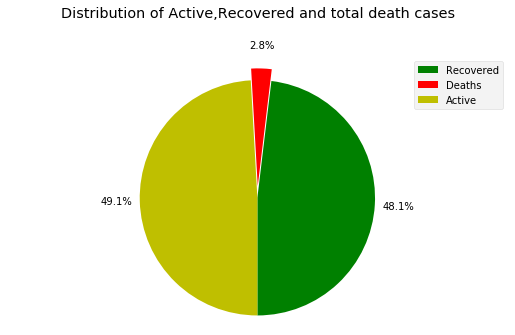

In [19]:
#Analysis for India
covid19_India = covid19[covid19['Country/Region']=='India']
byDate_India = covid19_India.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print('Total number of confirmed cases: ',byDate_India['Confirmed'].iloc[-1])
print('Total number of deaths:          ',byDate_India['Deaths'].iloc[-1])
print('Total number of recovered cases: ',byDate_India['Recovered'].iloc[-1])
print('Total number of active cases:    ',byDate_India['Confirmed'].iloc[-1]-byDate_India['Deaths'].iloc[-1]-byDate_India['Recovered'].iloc[-1])
print('Total number of closed cases:    ',byDate_India['Deaths'].iloc[-1]+byDate_India['Recovered'].iloc[-1])
labels = ['Recovered','Deaths','Active']
sizes = [byDate_India['Recovered'].iloc[-1],byDate_India['Deaths'].iloc[-1],byDate_India['Confirmed'].iloc[-1]-byDate_India['Recovered'].iloc[-1]-byDate_India['Deaths'].iloc[-1]]
colors = ['g','r','y']
explode = [0,0.1,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',explode=explode,pctdistance=1.2,colors = colors,startangle=-90)
plt.axis('equal')
plt.title('Distribution of Active,Recovered and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

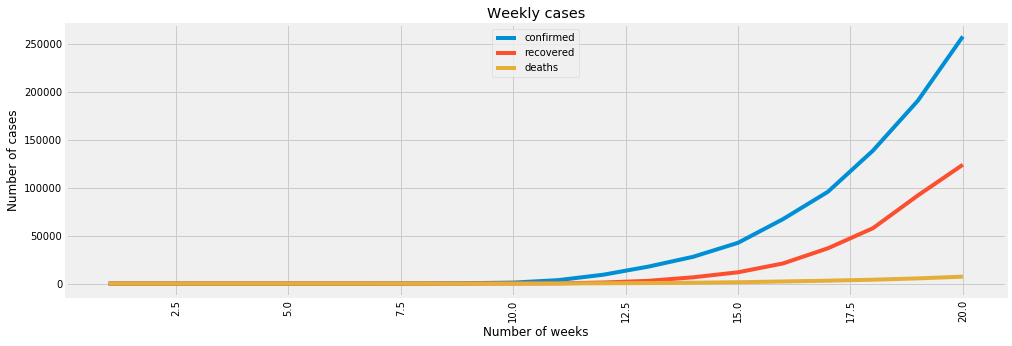

In [20]:
byDate_India['Weekly'] = byDate_India.index.weekofyear
week_number_India = []
weekly_confirmed_India = []
weekly_recovered_India = []
weekly_deaths_India = []

week = 1
for i in list(byDate_India['Weekly'].unique()):
  weekly_confirmed_India.append(byDate_India[byDate_India['Weekly']==i]['Confirmed'].iloc[-1])
  weekly_recovered_India.append(byDate_India[byDate_India['Weekly']==i]['Recovered'].iloc[-1])
  weekly_deaths_India.append(byDate_India[byDate_India['Weekly']==i]['Deaths'].iloc[-1])
  week_number_India.append(week)
  week = week+1

plt.figure(figsize = (15,5))
sns.lineplot(week_number_India,weekly_confirmed_India,label='confirmed')
sns.lineplot(week_number_India,weekly_recovered_India,label='recovered')
sns.lineplot(week_number_India,weekly_deaths_India,label='deaths')
plt.title('Weekly cases')
plt.xlabel('Number of weeks')
plt.ylabel('Number of cases')
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.show()

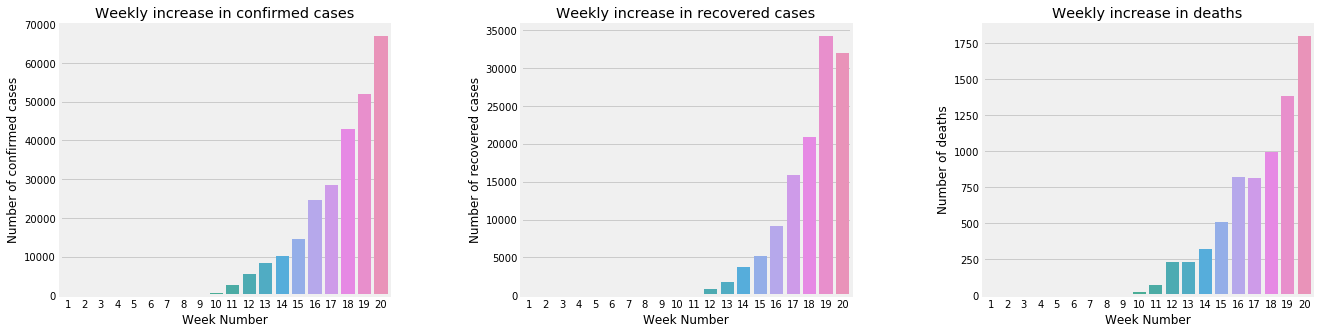

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(hspace=1, wspace=0.4)
sns.barplot(x=week_number_India,y=pd.Series(weekly_confirmed_India).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number_India,y=pd.Series(weekly_recovered_India).diff().fillna(0),ax=ax2)
sns.barplot(x=week_number_India,y=pd.Series(weekly_deaths_India).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax3.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of recovered cases')
ax3.set_ylabel('Number of deaths')
ax1.set_title('Weekly increase in confirmed cases')
ax2.set_title('Weekly increase in recovered cases')
ax3.set_title('Weekly increase in deaths')
plt.show()

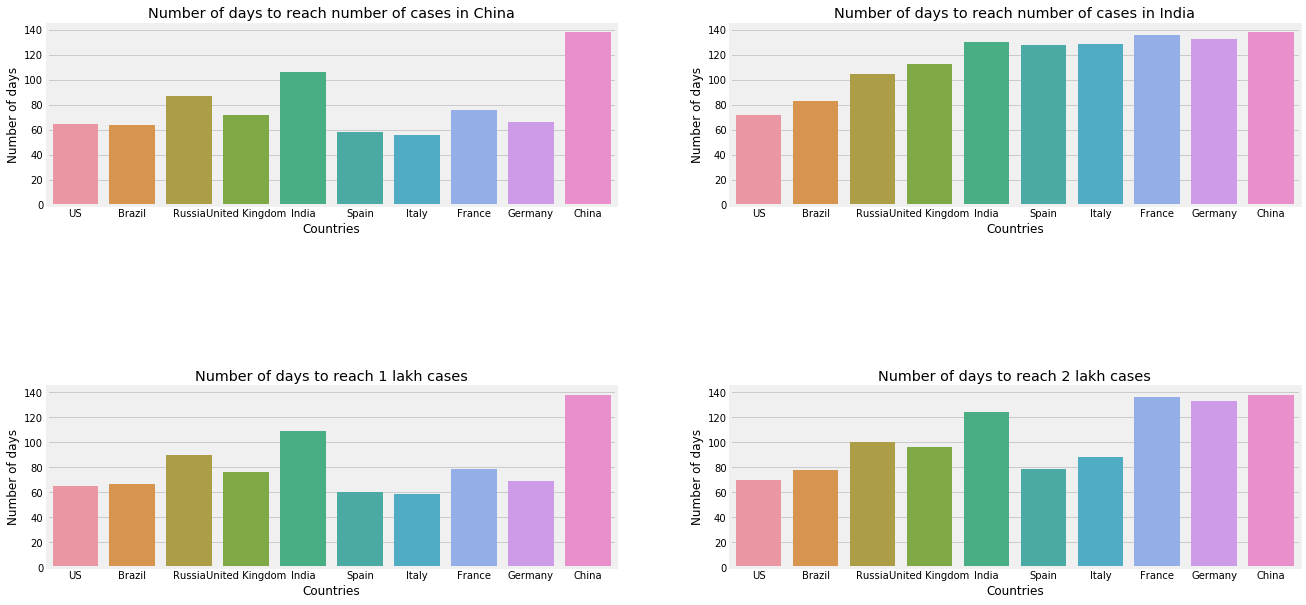

In [22]:
#Time taken by India to reach present number of cases compared to other countries
max_India = byDate_India['Confirmed'].max()
covid19_China = covid19[covid19['Country/Region']=='China']
byDate_China = covid19_China.groupby(['Date']).agg({'Confirmed':'sum'})
max_China = byDate_China['Confirmed'].max()
countries = ['US','Brazil','Russia','United Kingdom','India','Spain','Italy','France','Germany','China']
Number_of_days_to_reach_max_India = []
Number_of_days_to_reach_max_China = []
Number_of_days_to_reach_1lakhs = []
Number_of_days_to_reach_2lakhs = []
for country in countries:
  covid19_country = covid19[covid19['Country/Region']==country]
  byDate_country = covid19_country.groupby(['Date']).agg({'Confirmed':'sum'})
  n1 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=max_China)].shape[0]
  n2 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=max_India)].shape[0]
  n3 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=100000)].shape[0]
  n4 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=200000)].shape[0]
  Number_of_days_to_reach_max_China.append(n1)
  Number_of_days_to_reach_max_India.append(n2)
  Number_of_days_to_reach_1lakhs.append(n3)
  Number_of_days_to_reach_2lakhs.append(n4)

fig,axes = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.2)
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_max_China),ax=axes[0][0])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_max_India),ax=axes[0][1])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_1lakhs),ax=axes[1][0])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_2lakhs),ax=axes[1][1])
axes[0][0].set_xlabel('Countries')
axes[0][1].set_xlabel('Countries')
axes[1][0].set_xlabel('Countries')
axes[1][1].set_xlabel('Countries')
axes[0][0].set_ylabel('Number of days')
axes[0][1].set_ylabel('Number of days')
axes[1][0].set_ylabel('Number of days')
axes[1][1].set_ylabel('Number of days')
axes[0][0].set_title('Number of days to reach number of cases in China')
axes[0][1].set_title('Number of days to reach number of cases in India')
axes[1][0].set_title('Number of days to reach 1 lakh cases')
axes[1][1].set_title('Number of days to reach 2 lakh cases')
plt.show()

In [23]:
byDate['Days Since'] = byDate.index-byDate.index[0]
byDate['Days Since'] = byDate['Days Since'].dt.days
train_data = byDate.iloc[:int(byDate.shape[0]*0.95)]
test_data = byDate.iloc[int(byDate.shape[0]*0.95):]

In [ ]:
LR = LinearRegression(normalize=True)
SVM = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
LR.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))
SVM.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\Vedant Bharti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vedant Bharti\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
prediction_LR = LR.predict(np.array(test_data['Days Since']).reshape(-1,1))
prediction_SVM = SVM.predict(np.array(test_data['Days Since']).reshape(-1,1))
rmse_LR = np.sqrt(mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_LR))
rmse_SVM = np.sqrt(mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_SVM))
#DOUBT----- WHY IS RMSE SO LARGE?
print(rmse_LR)
print(rmse_SVM)
print('Percentage accuracy for linear regression model: ',(1-np.mean(np.abs((np.array(test_data['Confirmed']).reshape(-1,1)-prediction_LR)/np.array(test_data['Confirmed']).reshape(-1,1))))*100,'%')
print('Percentage accuracy for support vector regression model: ',(1-np.mean(np.abs((np.array(test_data['Confirmed']).reshape(-1,1)-prediction_SVM)/np.array(test_data['Confirmed']).reshape(-1,1))))*100,'%')


1743798.3227670616
455570.4933155592
Percentage accuracy for linear regression model:  73.88082614305782 %
Percentage accuracy for support vector regression model:  92.00557223438805 %


In [52]:
new_date = []
new_prediction_LR = []
new_prediction_SVM = []

for i in range(1,10):
  new_date.append(byDate.index[-1]+timedelta(days=i))
  new_prediction_LR.append(LR.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0][0])
  new_prediction_SVM.append(SVM.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x: '%.f'%x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_LR,new_prediction_SVM),columns=['Dates','LR','SVR'])
model_predictions.head(10)

Dates      LR     SVR
0 2020-06-08 5086485 7118003
1 2020-06-09 5133321 7363531
2 2020-06-10 5180157 7616228
3 2020-06-11 5226993 7876248
4 2020-06-12 5273829 8143751
5 2020-06-13 5320665 8418895
6 2020-06-14 5367501 8701845
7 2020-06-15 5414337 8992765
8 2020-06-16 5461172 9291822

In [53]:
#time series analysis and prediction using exponential smoothing
train_data_ts = byDate.iloc[:int(byDate.shape[0]*0.85)]
test_data_ts = byDate.iloc[int(byDate.shape[0]*0.85):]
#which one should we use, Holt's linear smoothing or Holt's exponential smoothing
#Holt's linear smoothing gives 96.8% accuracy and Holt's exponential smoothing gives 98.8% accuracy
#Also how to choose best parameters alpha and beta 
holt = Holt(np.asarray(train_data_ts['Confirmed']),exponential=True).fit(smoothing_level=0.5,smoothing_slope=0.5)
y_prediction = test_data_ts.copy()
y_prediction['Holt'] = holt.forecast(len(test_data_ts))
print('Percentage accuracy for exponential smoothing forecast: ',(1-np.mean(np.abs((np.array(test_data_ts['Confirmed']).reshape(-1,1)-np.array(y_prediction['Holt']).reshape(-1,1))/np.array(test_data_ts['Confirmed']).reshape(-1,1))))*100,'%')

Percentage accuracy for exponential smoothing forecast:  98.8117306941003 %


In [54]:
holt_new_date = []
holt_new_prediction = []
for i in range(1,10):
  holt_new_date.append(byDate.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(test_data_ts)+i))[-1])

model_predictions['Holt\'s linear model prediction'] = holt_new_prediction
model_predictions.head(10)

Dates      LR     SVR  Holt's linear model prediction
0 2020-06-08 5086485 7118003                         7334393
1 2020-06-09 5133321 7363531                         7482737
2 2020-06-10 5180157 7616228                         7634081
3 2020-06-11 5226993 7876248                         7788487
4 2020-06-12 5273829 8143751                         7946015
5 2020-06-13 5320665 8418895                         8106730
6 2020-06-14 5367501 8701845                         8270695
7 2020-06-15 5414337 8992765                         8437976
8 2020-06-16 5461172 9291822                         8608641